In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, auc, roc_curve
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve
from sklearn.decomposition import PCA
import missingno as msno
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("aps_failure_training_set.csv")
test = pd.read_csv("aps_failure_test_set.csv")

In [3]:
train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [4]:
test.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


In [5]:
print("shape of train dataset:", train.shape)
print("shape of test dataset:", test.shape)

shape of train dataset: (60000, 171)
shape of test dataset: (16000, 171)


In [6]:
train["class"].unique()

array(['neg', 'pos'], dtype=object)

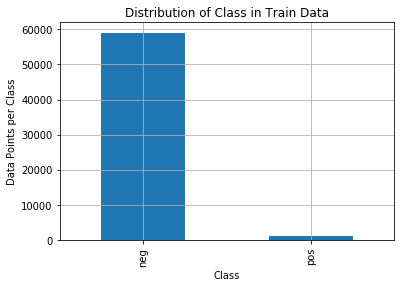

In [7]:
train_class_distribution = train['class'].value_counts()
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data Points per Class')
plt.title('Distribution of Class in Train Data')
plt.grid()
plt.show()

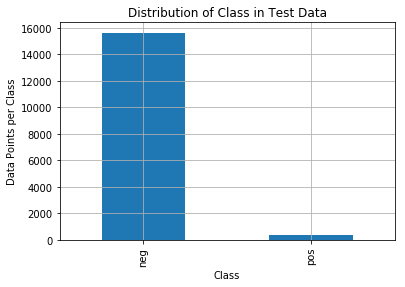

In [8]:
#这个是不是test的分布
test_class_distribution = test['class'].value_counts()
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data Points per Class')
plt.title('Distribution of Class in Test Data')
plt.grid()
plt.show()

In [9]:
#只修改返回值，不修改原数据
train.replace(to_replace = 'neg', value = 0, inplace = True)
train.replace(to_replace = 'pos', value = 1, inplace = True)
test.replace(to_replace = 'neg', value = 0, inplace = True)
test.replace(to_replace = 'pos', value = 1, inplace = True)

In [10]:
y_train = train["class"]
train.drop(['class'],axis = 1,inplace = True)
y_test = test['class']
test.drop(['class'],axis = 1,inplace = True)

In [11]:
train.replace(to_replace = 'na', value = np.NaN, inplace = True)
test.replace(to_replace = 'na', value = np.NaN,inplace = True)

In [12]:
train.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,NaN,2130706438,280,0,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,33058,NaN,0,NaN,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,41040,NaN,228,100,0,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,12,0,70,66,0,10,0,0,0,318,...,240,46,58,44,10,0,0,0,4,32
4,60874,NaN,1368,458,0,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


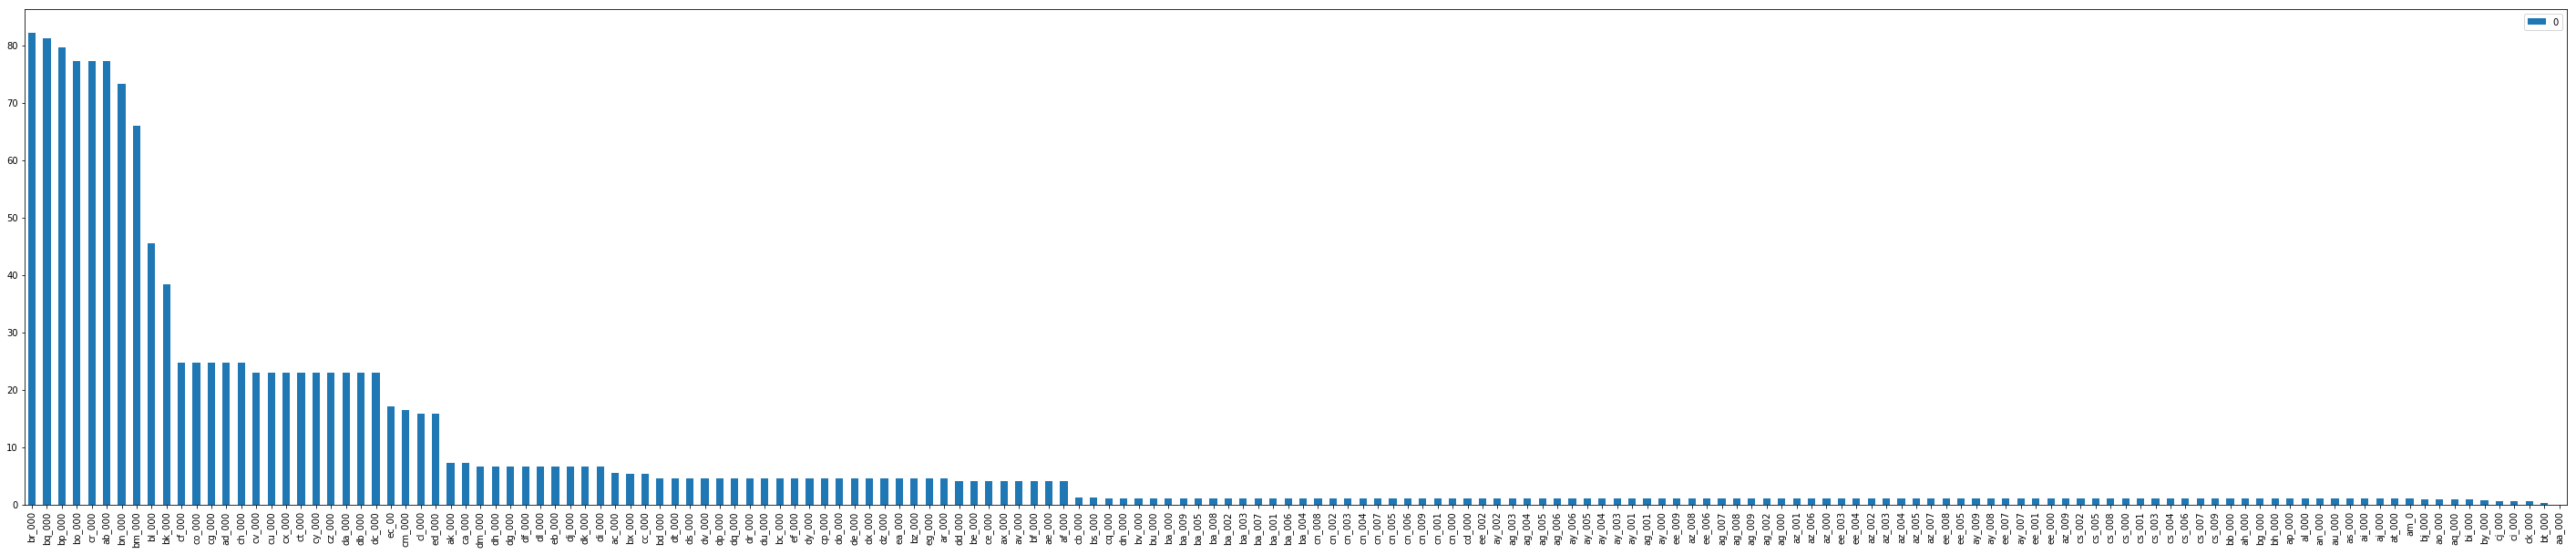

In [13]:
missing = train.isna().sum().div(train.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)
missing.plot.bar(figsize=(50,10))

In [14]:
#remove columns which contains more than 75% of NaN values
#75% of  60000 = 45000
train.dropna(axis = 1, thresh=45000, inplace = True)

In [15]:
new_columns = train.columns

In [16]:
removed_columns = train.columns

In [17]:
removed_columns = []
for i in test.columns:
    if i not in new_columns:
        removed_columns.append(i)

In [18]:
test.drop(removed_columns, axis = 1, inplace = True)

In [20]:
#mean imputation
mean_imputation = SimpleImputer(missing_values= np.nan, strategy='mean')
x_train_mean = mean_imputation.fit_transform(train)
x_test_mean = mean_imputation.transform(test)

In [21]:
#median imputation
median_imputation = SimpleImputer(missing_values=np.nan, strategy='median')
x_train_median = median_imputation.fit_transform(train)
x_test_median = median_imputation.transform(test)

In [22]:
#balance data with SMOTE
#SMOTE for mean imputed data
sm = SMOTE(random_state=2)
X_train_mean_sm, y_train_mean = sm.fit_sample(x_train_mean, y_train.ravel())

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
ss = StandardScaler()
X_train_mean_std = ss.fit_transform(X_train_mean_sm)
X_test_mean_std = ss.transform(x_test_mean)

In [25]:
#SMOTE for median imputed data
sm = SMOTE(random_state=2)
X_train_median_sm,y_train_median = sm.fit_sample(x_train_median, y_train.ravel())

In [26]:
ss = StandardScaler()
X_train_median_std = ss.fit_transform(X_train_median_sm)
X_test_median_std = ss.transform(x_test_median)

## utility functions

In [27]:
def plot_confusion_matrix(test_y, predict_y):
        
        '''
        This is function takes y_actual, y_predicted, and prints confusion matrix,
        f1_score and Total cost due to misclassification
    
        '''
        C = confusion_matrix(test_y, predict_y)
    
        plt.figure(figsize=(8,4))
    
        labels = ["neg","pos"]
        cmap=sns.light_palette("blue")
        sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
        plt.xlabel('Predicted Class')
        plt.ylabel('Actual Class')
        plt.title('Confusion Matrix')
    
        plt.show()
        cost_1 = 10*C[0][1]
        cost_2 = 500*C[1][0]
        total_cost = cost_1 + cost_2
        print("f1_score :",f1_score(test_y, predict_y))
        print("Total Cost Due to Misclassification:",total_cost)

In [28]:
def total_cost(test_y,predict_y):
    '''
    This function takes y_actual, y_predicted, and prints Total cost
    due to misclassification
    
    '''
    C = confusion_matrix(test_y, predict_y)
    cost_1 = 10*C[0][1]
    cost_2 = 500*C[1][0]
    total =(cost_1 + cost_2)
    return total

In [29]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
        '''
        Gives the plot of precision and recall vs thresholds
        '''
        plt.figure(figsize=(8,8))
        plt.title("Precision and Recall Scores as a function of the decision threshold")
        plt.plot(thresholds,precisions[:-1],"b--", label="Precision")
        plt.plot(thresholds,recalls[:-1],"g--", label="Recall")
        plt.ylabel("Score")
        plt.xlabel("Decision Threshold")
        plt.legend(loc="best")
        plt.grid()
        plt.show()

In [30]:
def pred_with_threshold(sig_clf_probs,t):
    '''
    This function takes probability scores and threshold value and
    classifies predictions based on the threshold value
    '''
    
    predictions = []
    for i in sig_clf_probs:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

## random model as a benchmark

In [31]:
import random

F1_score on Test Data using Random Model 0.04477073053315682


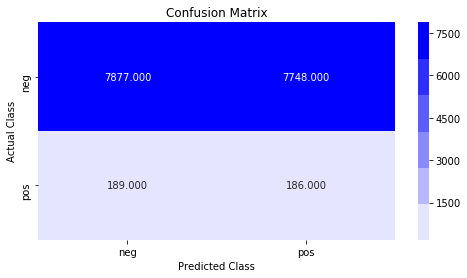

f1_score : 0.04477073053315682
Total Cost Due to Misclassification: 171980


In [32]:
test_len = X_test_mean_std.shape[0]
predicted_y = np.zeros((test_len))
for i in range(test_len):
    predicted_y[i] = random.randint(0,1)
print("F1_score on Test Data using Random Model",f1_score(y_test,predicted_y))

plot_confusion_matrix(y_test, predicted_y)

In [33]:
#XGB with mean

In [34]:
# parameters = {"max_depth": [5,8,10], "n_estimators":[300,500,1000,2000]}

# xgb = XGBClassifier()
# GCV = GridSearchCV(xgb,param_grid=parameters, scoring = 'f1', verbose = 1,cv=2, n_jobs = -1)
# GCV.fit(X_train_mean_std, y_train_mean)

In [35]:
# clf_xgb_mean=GCV.best_estimator_

In [36]:
# GCV.best_estimator_

In [37]:
# x_t, x_c, y_t, y_c = train_test_split(X_train_mean_std, y_train_mean, stratify=y_train_mean,
# test_size=0.3)
# clf_xgb_mean.fit(x_t, y_t)
# sig_clf_probs = clf_xgb_mean.predict_proba(x_c)[:,1]
# precision, recall, thresholds = precision_recall_curve(y_c,sig_clf_probs)
# plot_precision_recall_vs_threshold(precision,recall,thresholds)

In [38]:
# t=0.8

In [39]:
# clf=GCV.best_estimator_
# clf.fit(X_train_mean_std, y_train_mean)

In [40]:
# test_clf_probs = clf.precidt_proba(X_test_mean_std)[:,1]
# train_predictions = pred_with_threshold(test_clf_probes,t)

In [41]:
# print("Train Confusion Matrix")
# plot_confusion_matrix(y_train_constant, train_predictions)
# print("Test Confusion Matrix")
# plot_confusion_matrix(y_test, test_predictions)

## random forest with mean

In [42]:
parameters = {"max_depth":[3,5,8,10], "n_estimators":[100,300,500,1000,2000]}

RF = RandomForestClassifier()
GCV = GridSearchCV(RF,param_grid=parameters, scoring = "f1", verbose = 1, cv=2,n_jobs=-1)
GCV.fit(X_train_mean_std, y_train_mean)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 27.2min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [44]:
clf_rf_mean= GCV.best_estimator_

In [45]:
GCV.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

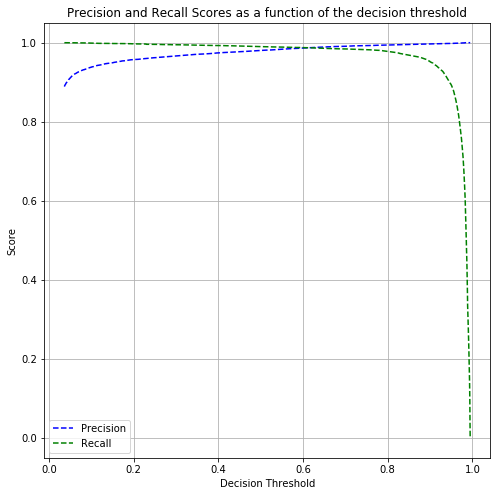

In [46]:
x_t, x_c, y_t, y_c = train_test_split(X_train_mean_std, y_train_mean, stratify=y_train_mean,
                                     test_size=0.3)
clf_rf_mean.fit(x_t, y_t)
sig_clf_probs = clf_rf_mean.predict_proba(x_c)[:,1]
precision,recall,threshold = precision_recall_curve(y_c,sig_clf_probs)
plot_precision_recall_vs_threshold(precision, recall, threshold)

In [47]:
t=0.6

In [48]:
clf=GCV.best_estimator_
clf.fit(X_train_mean_std, y_train_mean)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
test_clf_probs = clf.predict_proba(X_test_mean_std)[:,1]
train_clf_probs = clf.predict_proba(X_train_mean_std)[:,1]

In [53]:
train_predictions = pred_with_threshold(train_clf_probs,t)
test_predictions = pred_with_threshold(test_clf_probs,t)

Train Confusion Matrix


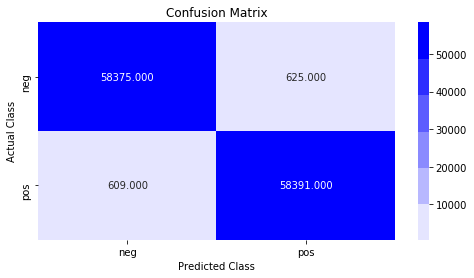

f1_score : 0.9895437906724512
Total Cost Due to Misclassification: 310750
Test Confusion Matrix


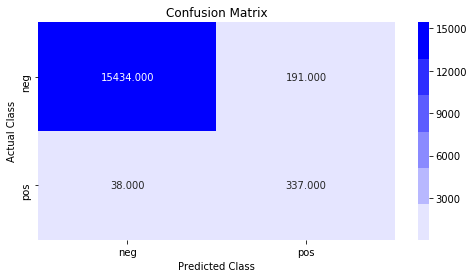

f1_score : 0.7464008859357697
Total Cost Due to Misclassification: 20910


In [55]:
print("Train Confusion Matrix")
plot_confusion_matrix(y_train_mean, train_predictions)
print("Test Confusion Matrix")
plot_confusion_matrix(y_test, test_predictions)

## Logistic Regression with mean

In [57]:
parameters = {"alpha": [10 ** x for x in range(-6, 3)], "penalty" : ['l2','l1'], "loss" : ['log','hinge']}

#Gridsearch CV with 8 fold crossvalidation

LR = SGDClassifier()    
GCV = GridSearchCV(LR,param_grid=parameters, scoring = "f1", verbose = 1,cv=8, n_jobs = -1)
GCV.fit(X_train_mean_std , y_train_mean )

Fitting 8 folds for each of 36 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  5.5min finished


GridSearchCV(cv=8, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                   10, 100],
                         'loss': ['log', 'hinge'], 'penalty': ['l2', 'l1']},
           

In [58]:
clf= GCV.best_estimator_

In [60]:
GCV.best_estimator_

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

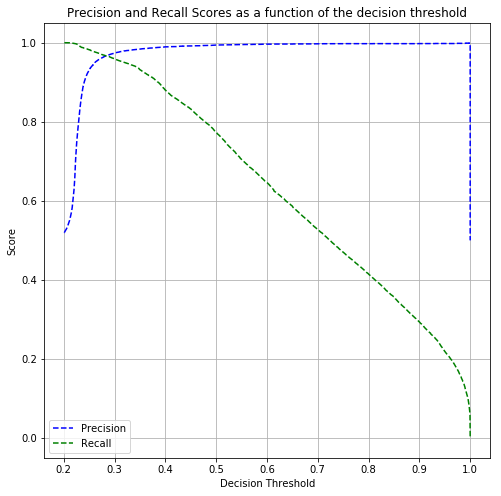

In [64]:
x_t, x_c, y_t, y_c = train_test_split(X_train_mean_std, y_train_mean, stratify=y_train_mean,
                                     test_size=0.3)
clf.fit(x_t, y_t)
sig_clf = CalibratedClassifierCV(clf,method="sigmoid")
sig_clf.fit(x_t, y_t)
sig_clf_probs = sig_clf.predict_proba(x_c)[:,1]
precision, recall, threshold = precision_recall_curve(y_c,sig_clf_probs)
plot_precision_recall_vs_threshold(precision,recall,threshold)



In [65]:
t=0.25

In [66]:
clf = GCV.best_estimator_
clf.fit(X_train_mean_std, y_train_mean)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_mean_std, y_train_mean)
test_clf_probs = sig_clf.predict_proba(X_test_mean_std)[:,1]
train_clf_probs = sig_clf.predict_proba(X_train_mean_std)[:,1]

In [67]:
train_predictions = pred_with_threshold(train_clf_probs,t)
test_predictions = pred_with_threshold(test_clf_probs,t)

Train Confusion Matrix


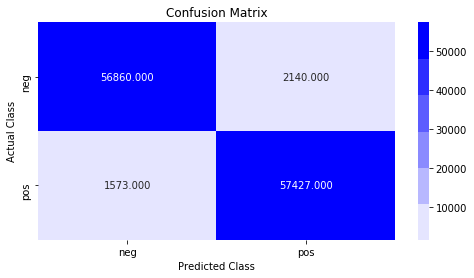

f1_score : 0.9686843725488543
Total Cost Due to Misclassification: 807900
Test Confusion Matrix


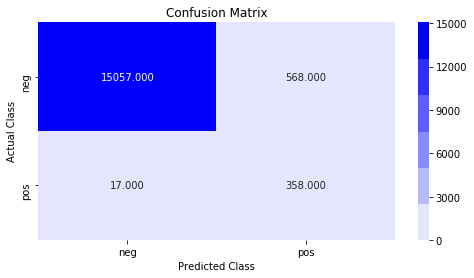

f1_score : 0.5503458877786318
Total Cost Due to Misclassification: 14180


In [69]:
print("Train Confusion Matrix")
plot_confusion_matrix(y_train_mean, train_predictions)
print("Test Confusion Matrix")
plot_confusion_matrix(y_test, test_predictions)

## random forest with median

## Logistic Regression with median

In [72]:
parameters = {"alpha": [10 ** x for x in range(-6, 3)], "penalty" : ['l2','l1'], "loss" : ['log','hinge']}
LR = SGDClassifier()
GCV = GridSearchCV(LR,param_grid=parameters, scoring = "f1", verbose=1,cv=8,n_jobs=-1)
GCV.fit(X_train_median_std, y_train_median)

Fitting 8 folds for each of 36 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  4.5min finished


GridSearchCV(cv=8, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                   10, 100],
                         'loss': ['log', 'hinge'], 'penalty': ['l2', 'l1']},
           

In [73]:
clf_sgd_median=GCV.best_estimator_

In [74]:
GCV.best_estimator_

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

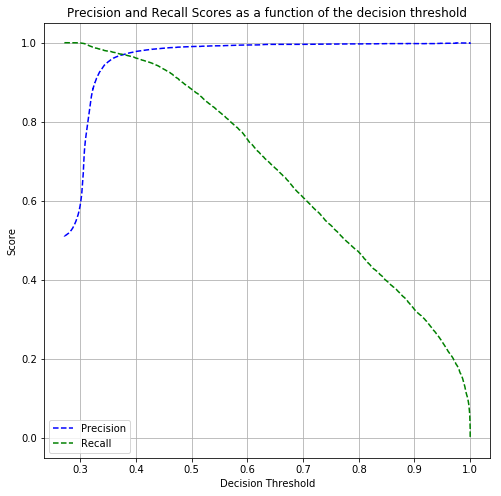

In [75]:
x_t, x_c, y_t, y_c = train_test_split(X_train_median_std, y_train_median,
                                     stratify=y_train_median, test_size=0.3)
clf_sgd_median.fit(x_t, y_t)
sig_clf = CalibratedClassifierCV(clf_sgd_median,method="sigmoid")
sig_clf.fit(x_t, y_t)
sig_clf_probs = sig_clf.predict_proba(x_c)[:,1]
precision,recall,threshold = precision_recall_curve(y_c,sig_clf_probs)
plot_precision_recall_vs_threshold(precision,recall,threshold)

In [76]:
t=0.32

In [77]:
clf=GCV.best_estimator_
clf.fit(X_train_median_std, y_train_median)
sig_clf = CalibratedClassifierCV(clf,method="sigmoid")
sig_clf.fit(X_train_median_std, y_train_median)
test_clf_probs = sig_clf.predict_proba(X_test_median_std)[:,1]
train_clf_probs = sig_clf.predict_proba(X_train_median_std)[:,1]

In [78]:
train_predictions = pred_with_threshold(train_clf_probs,t)
test_predictions = pred_with_threshold(test_clf_probs,t)

Train Confusion Matrix


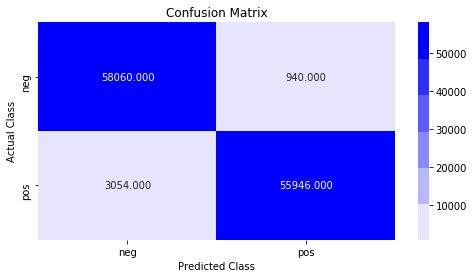

f1_score : 0.9655350948345789
Total Cost Due to Misclassification: 1536400
Test Confusion Matrix


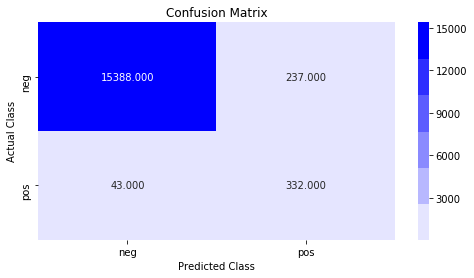

f1_score : 0.7033898305084746
Total Cost Due to Misclassification: 23870


In [79]:
print("Train Confusion Matrix")
plot_confusion_matrix(y_train_median, train_predictions)
print("Test Confusion Matrix")
plot_confusion_matrix(y_test,test_predictions)

## Conclusion

In [86]:
from prettytable import PrettyTable

In [87]:
pt=PrettyTable()
pt.field_names=["model","imputation_method","f1-score","total_cost"]
pt.add_row(["LR","Mean","0.550","14180"])
pt.add_row(["Random_Forest","Mean","0.746","20910"])
pt.add_row(["LR","Median","0.703","23870"])
pt.add_row(["Random_Forest","Median","0.592","10890"])

print(pt)

+---------------+-------------------+----------+------------+
|     model     | imputation_method | f1-score | total_cost |
+---------------+-------------------+----------+------------+
|       LR      |        Mean       |  0.550   |   14180    |
| Random_Forest |        Mean       |  0.746   |   20910    |
|       LR      |       Median      |  0.703   |   23870    |
| Random_Forest |       Median      |  0.592   |   10890    |
+---------------+-------------------+----------+------------+
